This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:    19994
Number of nonzeros in inequality constraint Jacobian.:     4001
Number of nonzeros in Lagrangian Hessian.............:     4000

Total number of variables............................:     6001
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     4002
Total number of inequality constraints...............:     4001
        inequality constraints with only lower bounds:     2001
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:     2000

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 1

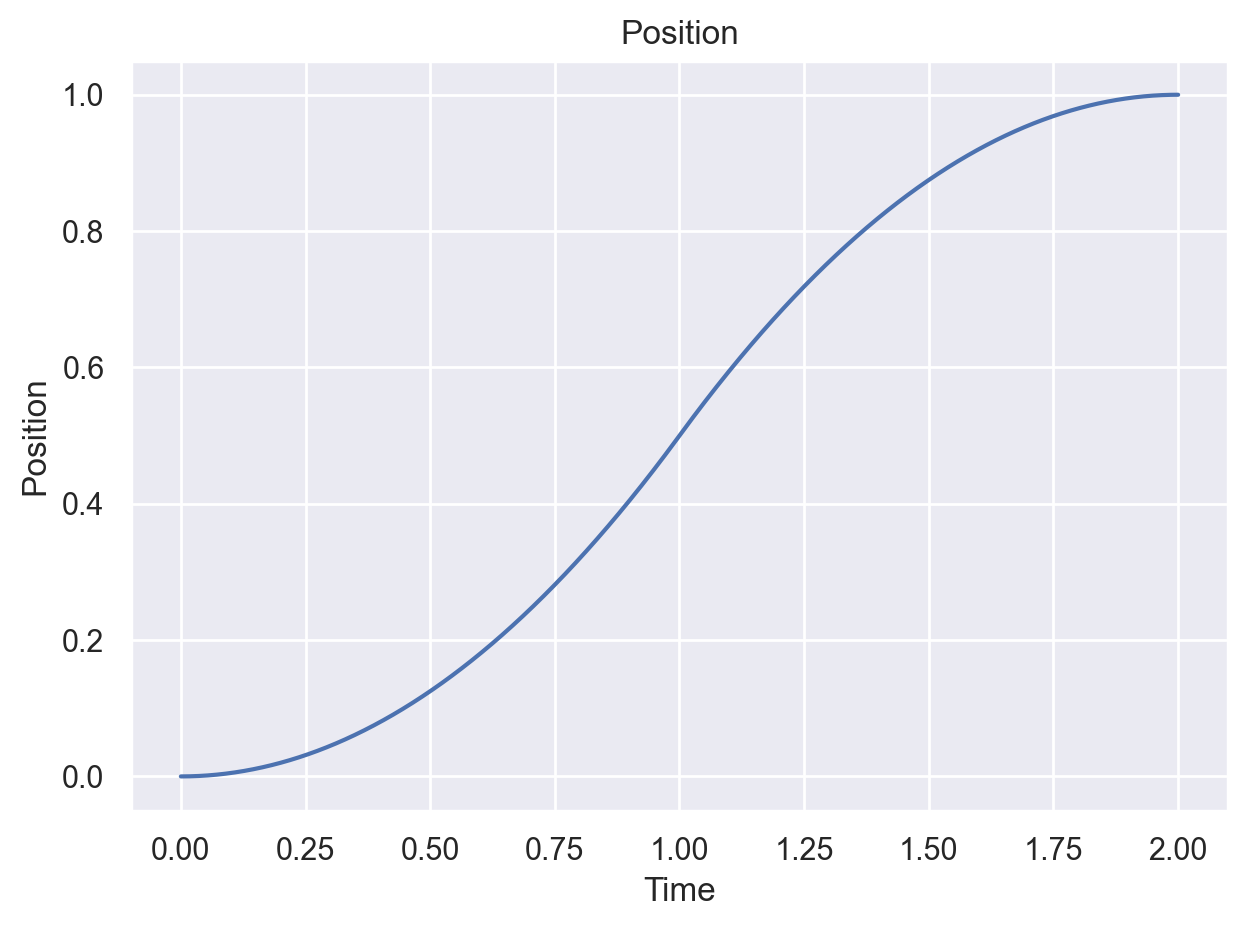

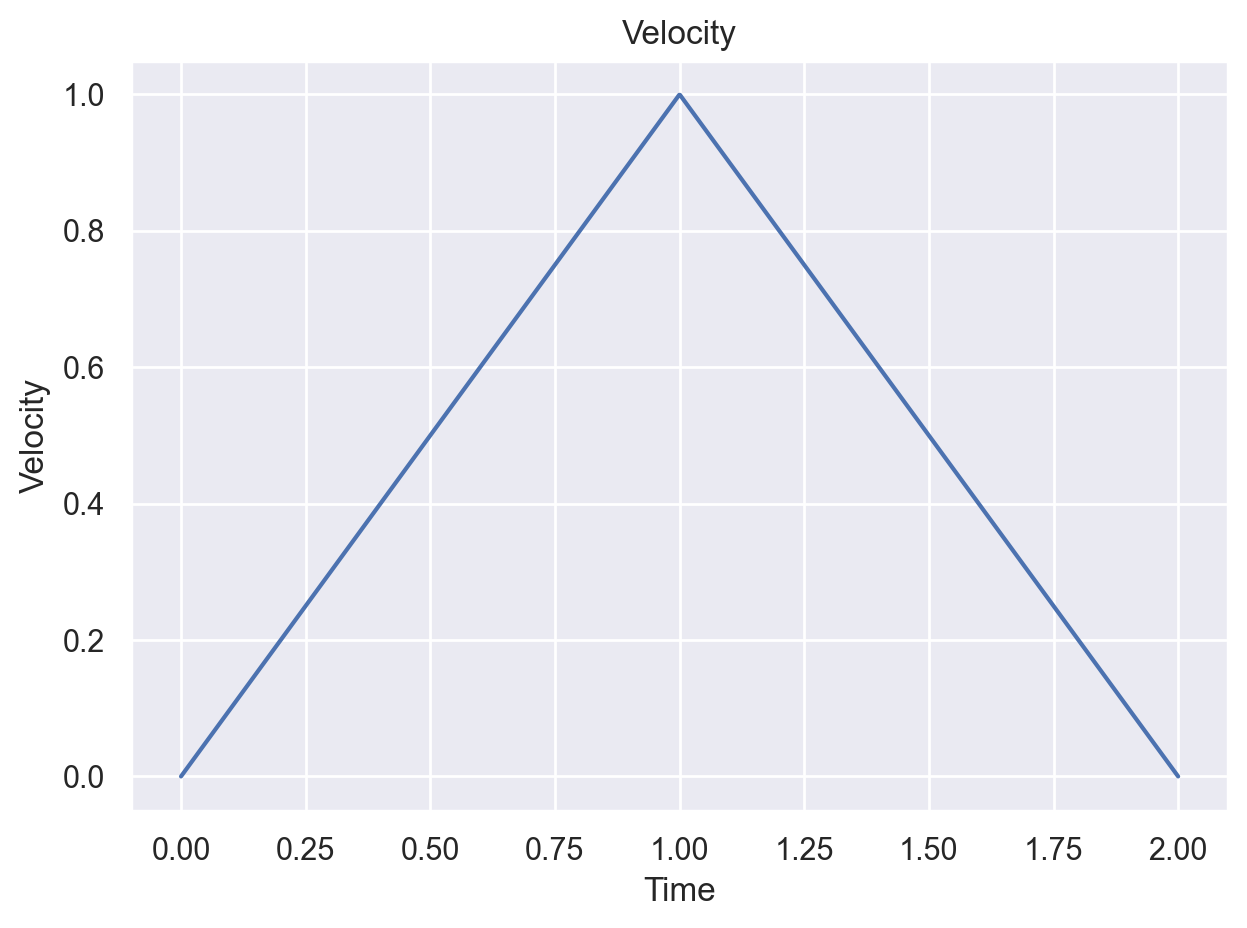

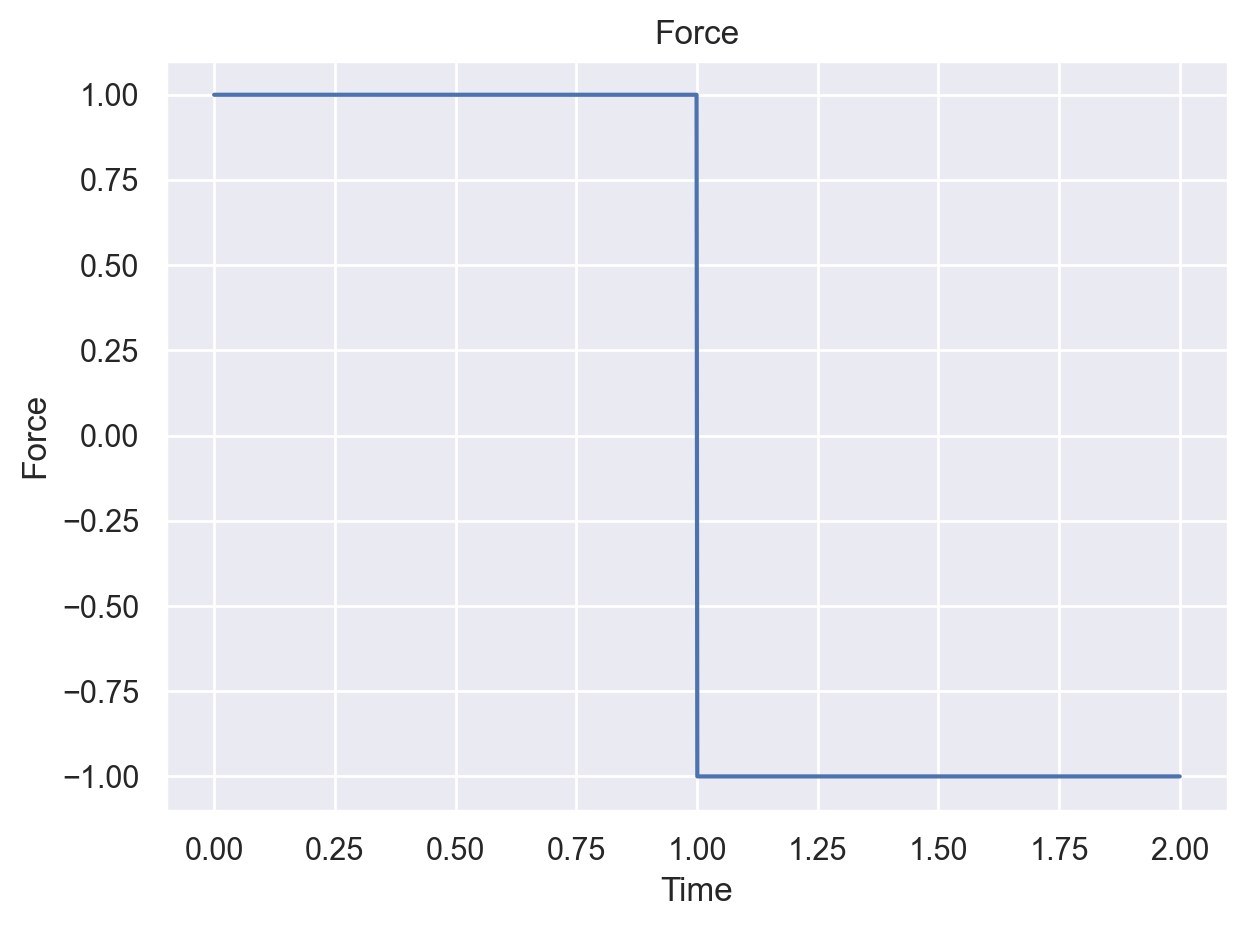

In [1]:
import aerosandbox as asb
import aerosandbox.numpy as np

n_timesteps = 2000 # This is *way* more than we need, but illustrating here to showcase scalability
mass_block = 1

opti = asb.Opti()

time_end = opti.variable(init_guess=1, lower_bound=0)

time = np.cosspace(0, time_end, n_timesteps)

position = opti.variable(
    init_guess=np.linspace(0, 1, n_timesteps)
)

velocity = opti.derivative_of(
    position,
    with_respect_to=time,
    derivative_init_guess=1,
)

force = opti.variable(
    init_guess=np.linspace(1, -1, n_timesteps),
    n_vars=n_timesteps,
    lower_bound=-1,
    upper_bound=1
)

opti.constrain_derivative(
    variable=velocity,
    with_respect_to=time,
    derivative=force / mass_block,
)

opti.minimize(time_end)

### Boundary conditions
opti.subject_to([
    position[0] == 0,
    position[-1] == 1,
    velocity[0] == 0,
    velocity[-1] == 0,
])

sol = opti.solve()

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize=(6.4, 4.8), dpi=200)
plt.plot(sol.value(time), sol.value(position))
plt.xlabel(r"Time")
plt.ylabel(r"Position")
plt.title(r"Position")
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(6.4, 4.8), dpi=200)
plt.plot(sol.value(time), sol.value(velocity))
plt.xlabel(r"Time")
plt.ylabel(r"Velocity")
plt.title(r"Velocity")
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(6.4, 4.8), dpi=200)
plt.plot(sol.value(time), sol.value(force))
plt.xlabel(r"Time")
plt.ylabel(r"Force")
plt.title(r"Force")
plt.tight_layout()
plt.show()